In [86]:
import pandas as pd
import json
import tabulate
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_notebook, show
import scipy
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
output_notebook()

Loading BokehJS ...

Data Reference: https://www.kaggle.com/datasnaek/youtube-new

In [3]:
us_data = pd.read_csv('ytdata/USvideos.csv')

In [4]:
catinfo = json.load(open('ytdata/US_category_id.json'))

In [105]:
cat_id_name = {item['id']: item['snippet']['title'] for item in catinfo['items']}

## Top 50 views are from these channels:

In [5]:
print(tabulate.tabulate({"Channel":us_data[us_data['category_id']==24].nlargest(50,'views')['channel_title'].unique()}, headers="keys", tablefmt="grid"))

+-----------------------------+
| Channel                     |
+=============================+
| YouTube Spotlight           |
+-----------------------------+
| Marvel Entertainment        |
+-----------------------------+
| Sony Pictures Entertainment |
+-----------------------------+
| FoxStarHindi                |
+-----------------------------+


## Likes and Dislikes Distribution

In [140]:
like_log_1 = np.log(us_data['likes'] + 1)
like_log = StandardScaler().fit_transform(like_log_1.values.reshape(-1,1))

params = scipy.stats.lognorm.fit(like_log)
params_chi = scipy.stats.chi2.fit(like_log)
params_wbmax = scipy.stats.weibull_max.fit(like_log)
params_gamma = scipy.stats.gamma.fit(like_log)

print("Weibull Max params: ", params_wbmax)
print("Gamma params: ", params_gamma)

hist, edges = np.histogram(like_log, density=True, bins=50)
mu = np.mean(like_log)
sigma = np.std(like_log)
x = np.linspace(-4,np.max(like_log),2000)
pdf_norm = scipy.stats.norm.pdf(x)
pdf_chi2 = scipy.stats.chi2.pdf(x, *params_chi)
pdf_wbmax = scipy.stats.weibull_max.pdf(x, params_wbmax[0]+1.25, *params_wbmax[1:])
pdf_gamma = scipy.stats.gamma.pdf(x, 371, -19.9, 0.0537979)
pdf = scipy.stats.lognorm.pdf(x, *params)
# skpdf = skewnorm.pdf(pdf, 4)

p = figure(title="Likes Distribution", background_fill_color="#fafafa", tools='')
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
# p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
p.line(x, pdf_norm, line_color="#778888", line_width=4, alpha=0.7, legend_label="PDF_NORM")
# p.line(x, pdf_chi2, line_color="#FFF999", line_width=4, alpha=0.7, legend_label="PDF_CHI2")
p.line(x, pdf_wbmax, line_color="#EEE000", line_width=4, alpha=0.7, legend_label="PDF_Weibull_Max")
p.line(x, pdf_gamma, line_color="#000000", line_width=4, alpha=0.7, legend_label="PDF_Gamma")


dis_like_log_1 = np.log(us_data['dislikes'] + 1)
dis_like_log = StandardScaler().fit_transform(dis_like_log_1.values.reshape(-1,1))

hist_dislikes, edges_dislikes = np.histogram(dis_like_log, density=True, bins=50)
pd = figure(title="Dislikes Distribution", background_fill_color="#fafafa", tools='')
pd.quad(top=hist_dislikes, bottom=0, left=edges_dislikes[:-1], right=edges_dislikes[1:],
           fill_color="navy", line_color="white", alpha=0.5)

x = np.linspace(-4,np.max(dis_like_log),2000)
dislike_pdf_norm = scipy.stats.norm.pdf(x)
pd.line(x, dislike_pdf_norm, line_color="#EEE000", line_width=4, alpha=0.7, legend_label="PDF_Norm")

show(gridplot([p,pd], ncols=2, plot_width=600, plot_height=400, toolbar_location=None))

Weibull Max params:  (2.8929950397095903, 2.8115448625071107, 3.1431575770625084)
Gamma params:  (371.0492367714935, -19.966180234757545, 0.053797981310699516)


<AxesSubplot:xlabel='dislikes'>

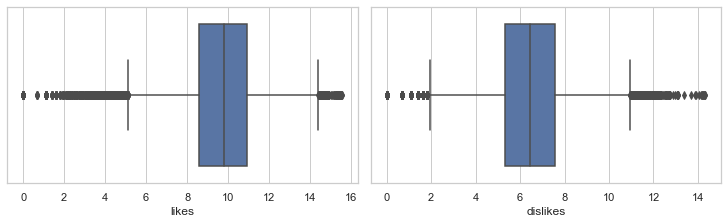

In [100]:
# fig = plt.figure(figsize=(6, 6))
box_like_fig = plt.figure(constrained_layout=True, figsize=(10,3))
grid = box_like_fig.add_gridspec(1, 2, hspace=0.2, wspace=0.2)
sns.boxplot(x=np.log(us_data['likes']+1), ax=plt.subplot(grid[0]))
sns.boxplot(x=np.log(us_data['dislikes']+1), ax=plt.subplot(grid[1]))

In [109]:
us_data['category_name'] = us_data['category_id'].apply(lambda x: cat_id_name[str(x)])
us_data['likes_log'] = np.log(us_data['likes']+1)
us_data['dislikes_log'] = np.log(us_data['dislikes']+1)

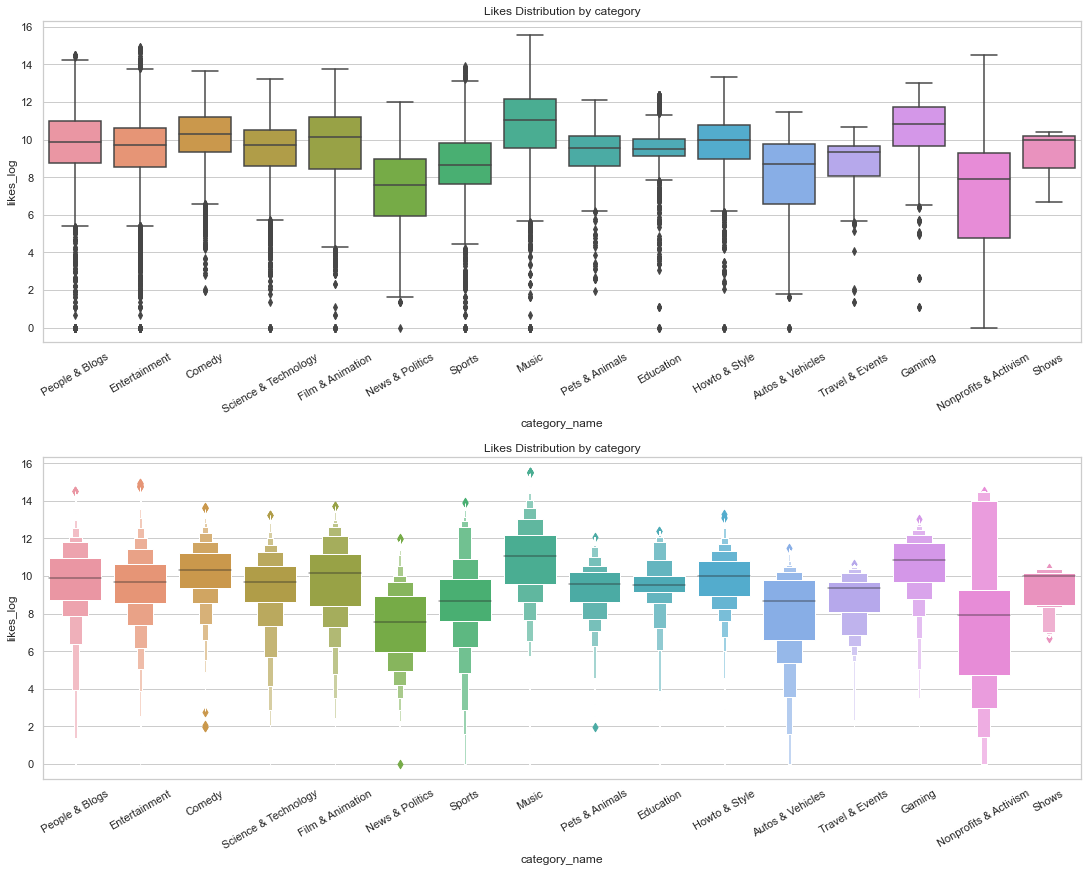

In [136]:
box_like_fig = plt.figure(constrained_layout=True, figsize=(15,12))
grid = box_like_fig.add_gridspec(2, 1, hspace=0.2, wspace=0.2)
ax = sns.boxplot(x="category_name", y="likes_log", data=us_data, ax=plt.subplot(grid[0, 0]))
ax.set_title("Likes Distribution by category")
text = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

ax = sns.boxenplot(x="category_name", y="likes_log", data=us_data, ax=plt.subplot(grid[1, 0]))
ax.set_title("Likes Distribution by category")
text = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

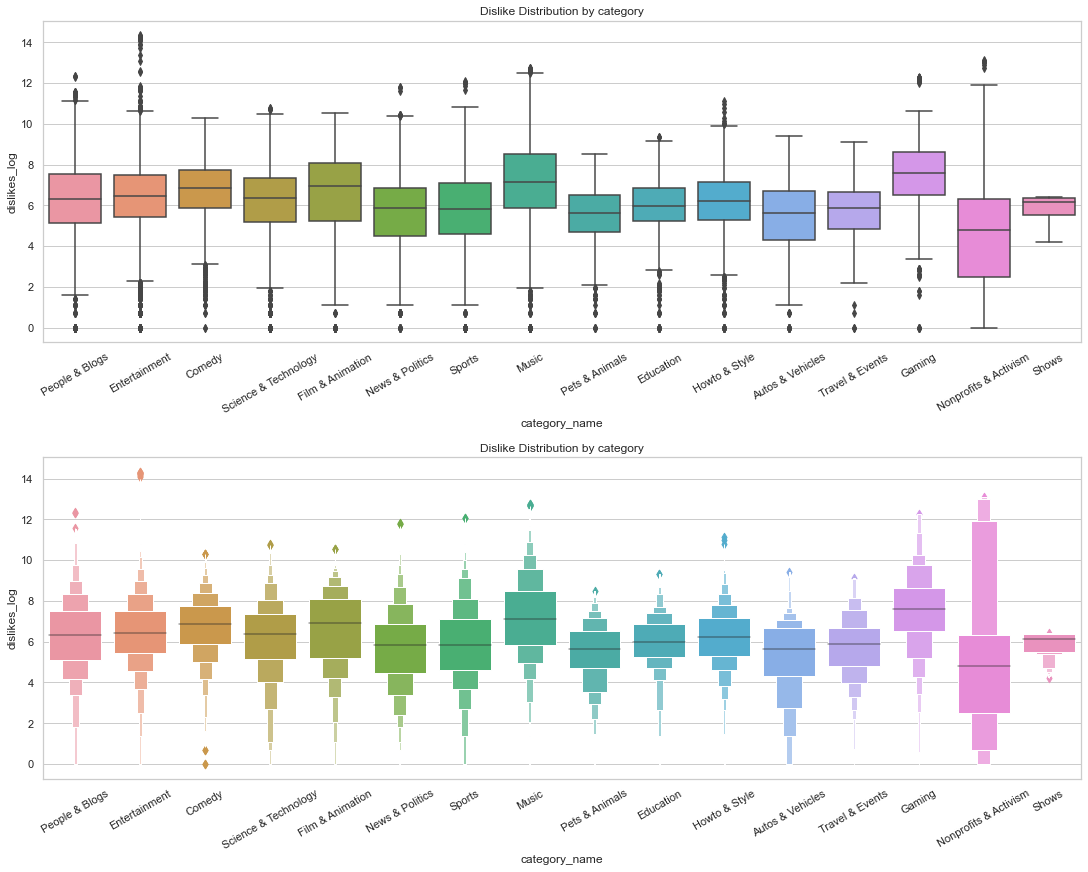

In [139]:
box_like_fig = plt.figure(constrained_layout=True, figsize=(15,12))
grid = box_like_fig.add_gridspec(2, 1, hspace=0.2, wspace=0.2)
ax = sns.boxplot(x="category_name", y="dislikes_log", data=us_data, ax=plt.subplot(grid[0, 0]))
ax.set_title("Dislike Distribution by category")
text = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


ax = sns.boxenplot(x="category_name", y="dislikes_log", data=us_data, ax=plt.subplot(grid[1, 0]))
ax.set_title("Dislike Distribution by category")
text = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)